# Resampling Methods

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Loading dataset
auto_df = pd.read_csv('./Textbook_Data/Auto.csv', na_values='?').dropna()
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# Cross Validation

In [3]:
# Using polynomial featrue generation in Scikit-learn

# Create a matrix dimension with p_order and r_state
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# Create X, Y coordinates and Z matrix with (X, Y) dimension with zero value
X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

# Create linear regression model
regr = skl_lm.LinearRegression()


In [4]:
# Generate 10 random splits of the dataset
for (i,j), v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    print(poly)
    X_poly = poly.fit_transform(auto_df.horsepower.values.reshape(-1,1))
    print(X_poly)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, auto_df.mpg.ravel(),
                                                       test_size=t_prop, random_state=Y[i,j])
    
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j] = mean_squared_error(y_test, pred)
    


PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)
[[  1. 130.]
 [  1. 165.]
 [  1. 150.]
 [  1. 150.]
 [  1. 140.]
 [  1. 198.]
 [  1. 220.]
 [  1. 215.]
 [  1. 225.]
 [  1. 190.]
 [  1. 170.]
 [  1. 160.]
 [  1. 150.]
 [  1. 225.]
 [  1.  95.]
 [  1.  95.]
 [  1.  97.]
 [  1.  85.]
 [  1.  88.]
 [  1.  46.]
 [  1.  87.]
 [  1.  90.]
 [  1.  95.]
 [  1. 113.]
 [  1.  90.]
 [  1. 215.]
 [  1. 200.]
 [  1. 210.]
 [  1. 193.]
 [  1.  88.]
 [  1.  90.]
 [  1.  95.]
 [  1. 100.]
 [  1. 105.]
 [  1. 100.]
 [  1.  88.]
 [  1. 100.]
 [  1. 165.]
 [  1. 175.]
 [  1. 153.]
 [  1. 150.]
 [  1. 180.]
 [  1. 170.]
 [  1. 175.]
 [  1. 110.]
 [  1.  72.]
 [  1. 100.]
 [  1.  88.]
 [  1.  86.]
 [  1.  90.]
 [  1.  70.]
 [  1.  76.]
 [  1.  65.]
 [  1.  69.]
 [  1.  60.]
 [  1.  70.]
 [  1.  95.]
 [  1.  80.]
 [  1.  54.]
 [  1.  90.]
 [  1.  86.]
 [  1. 165.]
 [  1. 175.]
 [  1. 150.]
 [  1. 153.]
 [  1. 150.]
 [  1. 208.]
 [  1. 155.]
 [  1. 160.]
 [  1. 190.]
 [  1.  97.]
 [  1

 [1.000000e+00 8.200000e+01 6.724000e+03 5.513680e+05]]
PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
[[1.000000e+00 1.300000e+02 1.690000e+04 2.197000e+06]
 [1.000000e+00 1.650000e+02 2.722500e+04 4.492125e+06]
 [1.000000e+00 1.500000e+02 2.250000e+04 3.375000e+06]
 ...
 [1.000000e+00 8.400000e+01 7.056000e+03 5.927040e+05]
 [1.000000e+00 7.900000e+01 6.241000e+03 4.930390e+05]
 [1.000000e+00 8.200000e+01 6.724000e+03 5.513680e+05]]
PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
[[1.000000e+00 1.300000e+02 1.690000e+04 2.197000e+06]
 [1.000000e+00 1.650000e+02 2.722500e+04 4.492125e+06]
 [1.000000e+00 1.500000e+02 2.250000e+04 3.375000e+06]
 ...
 [1.000000e+00 8.400000e+01 7.056000e+03 5.927040e+05]
 [1.000000e+00 7.900000e+01 6.241000e+03 4.930390e+05]
 [1.000000e+00 8.200000e+01 6.724000e+03 5.513680e+05]]
PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
[[1.000000e+00 1.300000e+02 1.690000e+04 2.197000e+06]
 

[[1.00000000e+00 1.30000000e+02 1.69000000e+04 ... 8.15730721e+16
  1.06044994e+19 1.37858492e+21]
 [1.00000000e+00 1.65000000e+02 2.72250000e+04 ... 5.49378367e+17
  9.06474305e+19 1.49568260e+22]
 [1.00000000e+00 1.50000000e+02 2.25000000e+04 ... 2.56289062e+17
  3.84433594e+19 5.76650391e+21]
 ...
 [1.00000000e+00 8.40000000e+01 7.05600000e+03 ... 2.47875891e+15
  2.08215749e+17 1.74901229e+19]
 [1.00000000e+00 7.90000000e+01 6.24100000e+03 ... 1.51710881e+15
  1.19851596e+17 9.46827608e+18]
 [1.00000000e+00 8.20000000e+01 6.72400000e+03 ... 2.04414086e+15
  1.67619550e+17 1.37448031e+19]]
PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)
[[1.00000000e+00 1.30000000e+02 1.69000000e+04 ... 8.15730721e+16
  1.06044994e+19 1.37858492e+21]
 [1.00000000e+00 1.65000000e+02 2.72250000e+04 ... 5.49378367e+17
  9.06474305e+19 1.49568260e+22]
 [1.00000000e+00 1.50000000e+02 2.25000000e+04 ... 2.56289062e+17
  3.84433594e+19 5.76650391e+21]
 ...
 [1.00000000e+00 8.400000

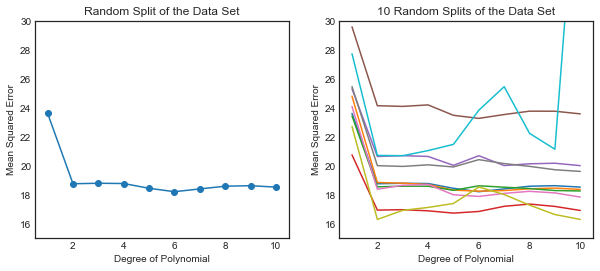

In [5]:
# Create Random Split PLots for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Left Plot (first split)
ax1.plot(X.T[0], Z.T[0], '-o')
ax1.set_title('Random Split of the Data Set')

# Right Plot (all split)
ax2.plot(X, Z)
ax2.set_title('10 Random Splits of the Data Set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15, 30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5, 10.5)
    ax.set_xticks(range(2,11,2));

# Leave One Out Cross Validation

In [6]:
# Create the order and state dimension
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# Create the Linear Regression Model
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(auto_df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(auto_df.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly,auto_df.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [7]:
print(scores)

[-24.231513517929226, -19.24821312448939, -19.334984064114092, -19.424430309411886, -19.033211842978407, -18.973012737758598, -19.12615044580855, -19.224230293732287, -19.133856501117418, -18.945837436861776]


# K-Fold Cross Validation

In [8]:
# Setting up the validation process
folds = 10
elements = len(auto_df.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = skl_lm.LinearRegression()


In [9]:
# Generate the K-Fold Cross Validation
for (i,j), v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(auto_df.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, auto_df.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()
    

In [10]:
print(Z)

[[-27.43993365 -27.43993365 -27.43993365 -27.43993365 -27.43993365
  -27.43993365 -27.43993365 -27.43993365 -27.43993365 -27.43993365]
 [-21.23584006 -21.23584006 -21.23584006 -21.23584006 -21.23584006
  -21.23584006 -21.23584006 -21.23584006 -21.23584006 -21.23584006]
 [-21.33660618 -21.33660618 -21.33660618 -21.33660618 -21.33660618
  -21.33660618 -21.33660618 -21.33660618 -21.33660618 -21.33660618]
 [-21.35388699 -21.35388699 -21.35388699 -21.35388699 -21.35388699
  -21.35388699 -21.35388699 -21.35388699 -21.35388699 -21.35388699]
 [-20.90564612 -20.90564612 -20.90564612 -20.90564612 -20.90564612
  -20.90564612 -20.90564612 -20.90564612 -20.90564612 -20.90564612]
 [-20.82189096 -20.82189096 -20.82189096 -20.82189096 -20.82189096
  -20.82189096 -20.82189096 -20.82189096 -20.82189096 -20.82189096]
 [-20.95310338 -20.95310338 -20.95310338 -20.95310338 -20.95310338
  -20.95310338 -20.95310338 -20.95310338 -20.95310338 -20.95310338]
 [-21.07713151 -21.07713151 -21.07713151 -21.07713151 -

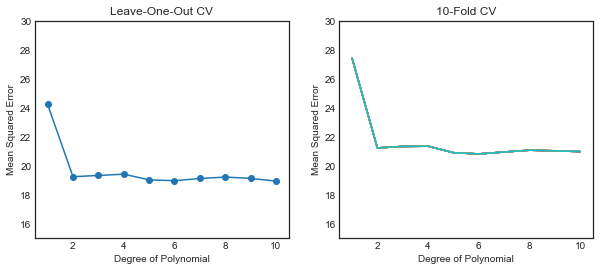

In [11]:
# Create two plots to compare the leave-one-out & 10-fold cross validation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Left Plot (Leave-One-Out)
ax1.plot(p_order, np.array(scores)*-1,'-o')
ax1.set_title('Leave-One-Out CV')

# Rigth Plot (10-Fold)
ax2.plot(X, Z*-1)
ax2.set_title('10-Fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15, 30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5, 10.5)
    ax.set_xticks(range(2, 11, 2));